## Stock Data Comparison: Tesla vs. GameStop

#### Importing all necessary libraries

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sn
import yfinance as yf
import matplotlib.pyplot as plt

#### Extracting Stock Data for Tesla

In [2]:
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(interval = "1mo", start = "2009-06-30", end = "2022-03-31")
tesla_data.reset_index(inplace=True)
tesla_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
137,2021-11-01,1145.000000,1243.489990,978.599976,1144.760010,649111500.0,0,0.0
138,2021-12-01,1160.699951,1172.839966,886.119995,1056.780029,510055900.0,0,0.0
139,2022-01-01,1147.750000,1208.000000,792.010010,936.719971,638668800.0,0,0.0
140,2022-02-01,935.210022,947.770020,700.000000,870.429993,463708900.0,0,0.0
141,2022-03-01,869.679993,1114.770020,756.039978,1077.599976,576424300.0,0,0.0


#### Extracting Stock Data for GME

In [11]:
GameStop = yf.Ticker("GME")
gme_data = GameStop.history(interval = "1mo", start ="2009-01-31", end = "2022-03-31")
gme_data.reset_index(inplace=True)
gme_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
180,2021-11-01,182.529999,255.690002,182.050003,196.210007,53297100.0,0.0,0
181,2021-12-01,199.399994,200.110001,129.500000,148.389999,59494000.0,0.0,0
182,2022-01-01,149.229996,160.309998,86.290001,108.930000,84623200.0,0.0,0
183,2022-02-01,113.010002,132.850006,95.080002,123.339996,46284300.0,0.0,0
184,2022-03-01,122.190002,199.410004,77.580002,166.580002,159143700.0,0.0,0


#### Extracting Tesla Revenue Data

In [4]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
tesla_revenue = pd.read_html(url)[1]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex = True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.head()


,Date,Revenue
0,2022-03-31,18756
1,2021-12-31,15339
2,2021-09-30,13757
3,2021-06-30,11958
4,2021-03-31,10389


#### Exracting GME Revenue Data

In [5]:
url = ("https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue")
gme_revenue = pd.read_html(url)[1]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"]  = gme_revenue["Revenue"].str.replace(',|\$',"",regex = True)
gme_revenue.dropna(inplace = True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.head()

,Date,Revenue
0,2022-01-31,2254
1,2021-10-31,1297
2,2021-07-31,1183
3,2021-04-30,1277
4,2021-01-31,2122


#### Plotting graphs

In [6]:
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])

In [7]:
sn.set_style("whitegrid")

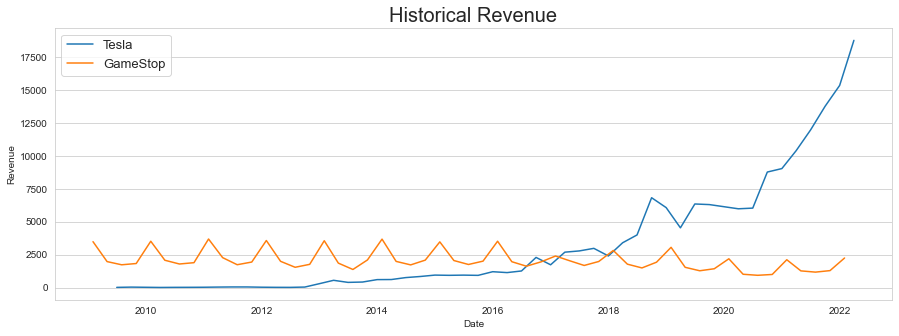

In [8]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
sn.lineplot(data = tesla_revenue, x = 'Date', y= 'Revenue', label = "Tesla")
sn.lineplot(data = gme_revenue, x = 'Date', y= 'Revenue', label = "GameStop")
plt.title("Historical Revenue", fontsize = 20)
plt.grid(axis = 'x')
plt.legend(fontsize = 13)
plt.show()

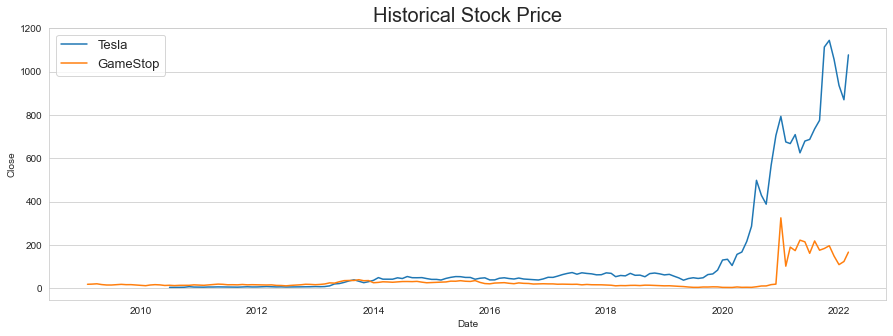

In [9]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
sn.lineplot(data = tesla_data, x = 'Date', y= 'Close', label = "Tesla")
sn.lineplot(data = gme_data, x = 'Date', y= 'Close', label = "GameStop")
plt.title("Historical Stock Price", fontsize = 20)
plt.grid(axis = 'x')
plt.legend(fontsize = 13)
plt.show()

#### Conclusion: 
It is visible that Tesla stock price rises with its revenue. When it comes to GameStop stock price increase in 2021 we can see it has nothing to do with the revenue that they make, which can be further proved with some statistics.